# Supervised-Algorithms

Supervised learning is a machine learning technique that is widely used in various fields such as finance, healthcare, marketing, and more. It is a form of machine learning in which the algorithm is trained on labeled data to make predictions or decisions based on the data inputs.In supervised learning, the algorithm learns a mapping between the input and output data. This mapping is learned from a labeled dataset, which consists of pairs of input and output data. The algorithm tries to learn the relationship between the input and output data so that it can make accurate predictions on new, unseen data.

## General description about the file

*In this file, 5 supervised algorithms:  K-Nearest-Neighbors, Naive-Bayes, Logistic-Regression, Decision-Tree, support-vector-machine are analyzed by Dataset campaign_responses.*

### First, to work with each of the algorithms, we need to import the main libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

**Read Dataset:**

In [2]:
df = pd.read_csv('campaign_responses.csv')

**Make sure that the dataset is read correctly, we can use `df.head()` or `df.tail()` command to see some of its rows:**

In [3]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [4]:
df.tail()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
51,52,31,Female,50000,680,Yes,Single,0,No
52,53,46,Male,98000,800,Yes,Married,3,Yes
53,54,28,Female,42000,630,No,Single,0,No
54,55,41,Male,90000,770,Yes,Married,2,Yes
55,56,34,Female,60000,710,Yes,Single,1,No


**View general data information:**

In [5]:
df.shape

(56, 9)

In [6]:
df.dtypes

customer_id        int64
age                int64
gender            object
annual_income      int64
credit_score       int64
employed          object
marital_status    object
no_of_children     int64
responded         object
dtype: object

**Checking null values:**
*<p>Using the following command, if there is a null value in the dataset, it will return it, and if there is no null value, it will show us False.</p>*

In [7]:
df.isnull().values.any()

False

**See how many of each type we have in the `responded` column:**

In [8]:
df['responded'].value_counts()

responded
Yes    28
No     28
Name: count, dtype: int64

**Convert non-numeric values to numeric values:** *<p>We did this so that we don't get into trouble for making the model.</p>*

In [9]:
df['employed'] = df['employed'].map({'No': 0, 'Yes': 1}).astype(int)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
df['marital_status'] = df['marital_status'].map({'Single': 0, 'Married': 1}).astype(int)

In [10]:
df.to_csv('updated_campaign_responses.csv', index=False)

**Determining the values of `x` and `y`:**

In [11]:
x = df.drop(labels=['responded', 'customer_id', 'gender'], axis=1)
y = df.responded

**In order to make the data easier for the computer to run and read, they can be normalized, which is called `normalization`.**

In [12]:
from scipy.stats import zscore

In [13]:
scale = x.apply(zscore)
scale.head(5)

,age,annual_income,credit_score,employed,marital_status,no_of_children
0,-0.172859,-0.177936,0.014931,0.549841,1.0,0.607457
1,-1.169337,-1.063659,-0.653970,-1.818706,-1.0,-1.093422
2,0.823620,0.707788,0.516607,0.549841,1.0,1.457896
3,-0.742275,-0.620797,-0.152294,0.549841,-1.0,-0.242983
4,1.535390,1.150650,1.185508,0.549841,1.0,0.607457


**Definition `test` and `train`:**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=100)

**Show the percentage value for each part:**

In [16]:
print(np.around(len(x_train)/len(df)*100 , 2), '% Data for training set')
print(np.around(len(x_test)/len(df)*100 , 2), '% Data for testing set')

75.0 % Data for training set
25.0 % Data for testing set


### **1. Naive-Bayes**

Naive Bayes is part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

**Importing necessary libraries for Naive-Bayes:**

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

In [18]:
replacement = SimpleImputer(missing_values=0, strategy='mean')
cols = x_train.columns
x_train = pd.DataFrame(replacement.fit_transform(x_train))
x_test = pd.DataFrame(replacement.fit_transform(x_test))

In [19]:
x_train.columns = cols
x_test.columns = cols

**Import model:**

In [20]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred = NB_model.predict(x_test)

**Model measurement accuracy test:**

In [22]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes']


**Calculate Score:**

In [23]:
print('Score:', np.around(NB_model.score(x_test, y_test)*100, 2), '%')

Score: 92.86 %


**Show Heatmap:**

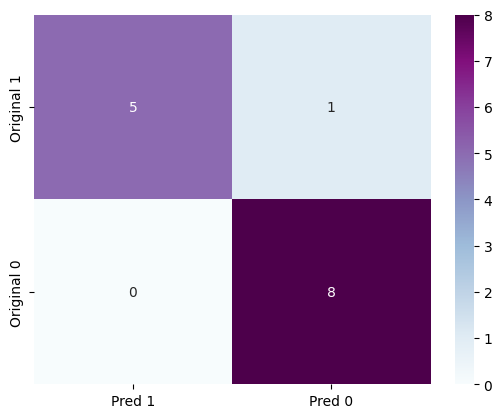

In [24]:
comparison = metrics.confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
comparison_data = pd.DataFrame(comparison, index=['Original 1', 'Original 0'], columns=['Pred 1', 'Pred 0'])
sns.heatmap(comparison_data, annot=True, cmap='BuPu')
plt.show()

In [25]:
check_NB = metrics.classification_report(y_test, y_pred, labels=['Yes', 'No'])
print(check_NB)

              precision    recall  f1-score   support

         Yes       1.00      0.83      0.91         6
          No       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



### **2. K-Nearest-Neighbors**

*The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.*

**Importing necessary libraries for K-Nearest-Neighbors:**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**Import model:**

In [27]:
KNN_model = KNeighborsClassifier(n_neighbors=10, weights='distance')
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [28]:
y_pred = KNN_model.predict(x_test)

**Model measurement accuracy test:**

In [29]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes']


**Calculate Score:**

In [30]:
print('Score:', np.around(KNN_model.score(x_test, y_test)*100, 2), '%')

Score: 92.86 %


**Calculate average cross_val_score:**

In [31]:
cross = np.around(cross_val_score(KNN_model, scale, y, cv=10)*100, 2)
print('Average Cross Val Score:', np.around(np.median(cross), 2), '%')

Average Cross Val Score: 100.0 %


**Show Heatmap:**

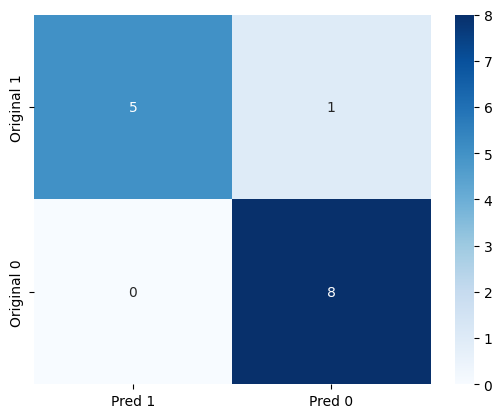

In [32]:
comparison = metrics.confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
comparison_data = pd.DataFrame(comparison, index=['Original 1', 'Original 0'], columns=['Pred 1', 'Pred 0'])
sns.heatmap(comparison_data, annot=True, cmap='Blues')
plt.show()

**Define value of K:**

In [33]:
k = 50
scores = np.zeros(shape=(k))
for h in range(1, k + 1):
    KNNs = KNeighborsClassifier(n_neighbors = h)
    score_h = cross_val_score(KNNs, scale, y, cv=15)
    scores[h-1] = score_h.mean()

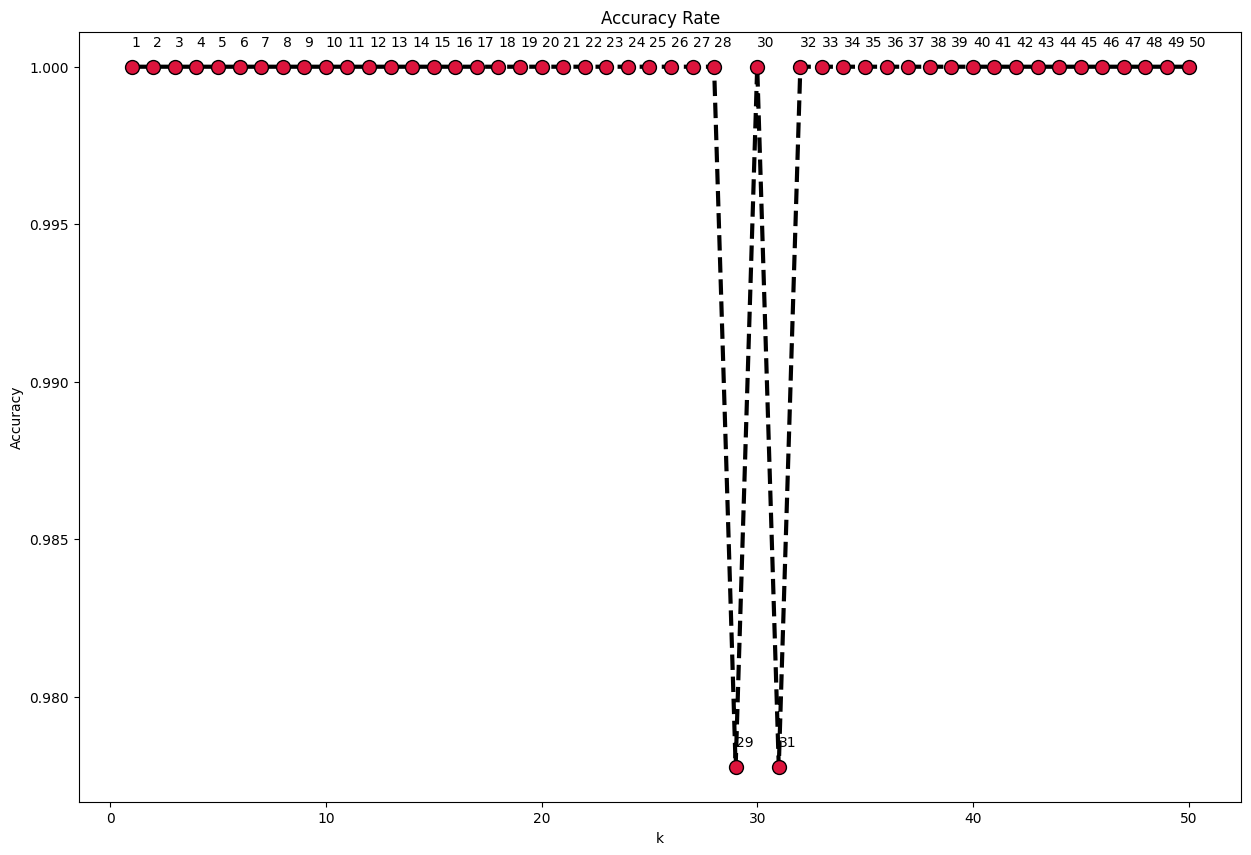

In [34]:
# ?!

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(1, k + 1), scores, color='black', linestyle='dashed', lw=3, marker='o', markerfacecolor='crimson', markersize=10)
annotations = [f"{h}" for h in range(1, k + 1)]
for xi, yi, text in zip(range(1, k + 1), scores, annotations):
    ax.annotate(text, xy=(xi, yi), xycoords='data', xytext=(0, 15), textcoords='offset points')
plt.title('Accuracy Rate')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [35]:
check_KNN = metrics.classification_report(y_test, y_pred, labels=['Yes', 'No'])
print(check_KNN)

              precision    recall  f1-score   support

         Yes       1.00      0.83      0.91         6
          No       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



### **3. Decision-Tree**

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

**Importing the library for the Decision-Tree algorithm and building the model:**

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [38]:
y_pred = DT_model.predict(x_test)

**Model measurement accuracy test:**

In [39]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes']


**Calculate Score:**

In [40]:
print('Score:', np.around(DT_model.score(x_test, y_test)*100, 2), '%')

Score: 85.71 %


**Show Heatmap:**

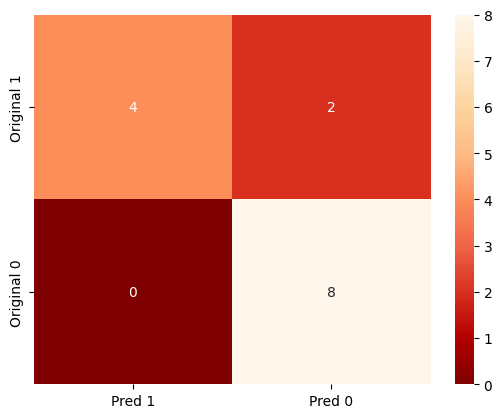

In [41]:
comparison = metrics.confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
comparison_data = pd.DataFrame(comparison, index=['Original 1', 'Original 0'], columns=['Pred 1', 'Pred 0'])
sns.heatmap(comparison_data, annot=True, cmap='OrRd_r')
plt.show()

**Draw a decision tree diagram and display it:**

*To draw the decision tree, we must first import the required library and create a model for it, and then display the decision tree with `plot_tree(clf, filled=True, feature_names=x.columns, class_names=y.unique())` code.*

In [42]:
from sklearn.tree import plot_tree

In [43]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

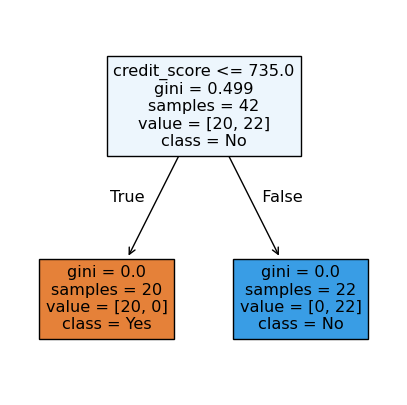

In [44]:
plt.figure(figsize=(5, 5))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=y.unique())
plt.show()

### **4. Logistic-Regression**

What Is Logistic Regression? Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

**Importing required library for Logistic-Regression and building the model:**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LR_model = LogisticRegression(C=0.01, solver='liblinear')
LR_model.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [47]:
y_pred = LR_model.predict(x_test)
y_pred_prob = LR_model.predict_proba(x_test)

**Model measurement accuracy test:**

In [48]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes']
['No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes']


**Calculate Score:**

In [49]:
print('Score:', np.around(LR_model.score(x_test, y_test)*100, 2), '%')

Score: 92.86 %


**Show jaccard Score:**

In [50]:
from sklearn.metrics import jaccard_score

In [51]:
jaccard_score(y_test, y_pred, pos_label='Yes')

0.8333333333333334

In [52]:
jaccard_score(y_test, y_pred, pos_label='No')

0.8888888888888888

**Show Heatmap:**

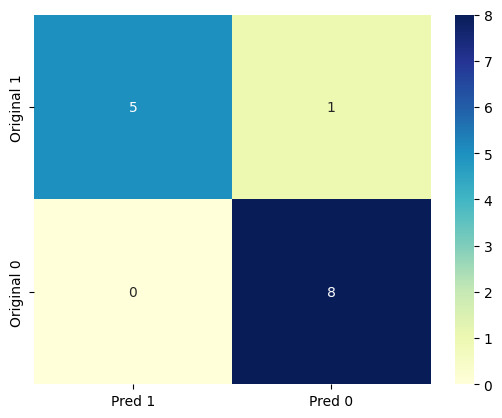

In [53]:
comparison = metrics.confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
comparison_data = pd.DataFrame(comparison, index=['Original 1', 'Original 0'], columns=['Pred 1', 'Pred 0'])
sns.heatmap(comparison_data, annot=True, cmap='YlGnBu')
plt.show()

### **5. support-vector-machine (SVM)**

In machine learning, SVM is used to classify data by finding the optimal decision boundary that maximally separates different classes. It aims to find the best hyperplane that maximizes the margin between support vectors, enabling effective classification even in complex, non-linear scenarios.

**POINT:** *The `find_index` function is used to find the indexes of rows in a dataset where a particular value appears in the first column. In other words, it returns the indices of the rows that have the specified value in the first column of the DataFrame. For example, if the value `Yes` is present in the first column, this function returns the indices of those rows.*

In [54]:
def find_index(dataset, char):
    indices = np.where(np.array(dataset)[:, 0:] == char)[0]
    return indices
b_indices = find_index(df, 'Yes')
df.iloc[b_indices].head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,0,65000,720,1,1,2,Yes
2,3,42,0,85000,750,1,1,3,Yes
4,5,47,0,95000,790,1,1,2,Yes
6,7,39,0,72000,740,1,1,2,Yes
8,9,51,0,110000,820,1,1,3,Yes


In [55]:
def find_index(dataset, char):
    indices = np.where(np.array(dataset)[:, 0:] == char)[0]
    return indices
b_indices = find_index(df, 'No')
df.iloc[b_indices].head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
1,2,28,1,45000,680,0,0,0,No
3,4,31,1,55000,710,1,0,1,No
5,6,25,1,38000,630,0,0,0,No
7,8,33,1,48000,670,1,0,0,No
9,10,27,1,40000,620,0,0,0,No


**In this algorithm, we redefine the value of `x` and `y`:**

In [56]:
x = np.array(df)[:, 1:6]
y = np.array(df.responded)

**In this algorithm, to show the method of manual input of `test` and `train` values, we acted as follows:**

In [57]:
x_train = x[:, :]
x_test = x[:, :]
y_train = y[:]
y_test = y[:]

**Importing the library required by SVM and building the model:**

In [58]:
from sklearn import svm

In [59]:
SVM_model = svm.SVC(C=0.5)
SVM_model.fit(x_train, y_train)

SVC(C=0.5)

In [60]:
y_pred = SVM_model.predict(x_test)

**Model measurement accuracy test:**

In [61]:
print(np.array(y_test)[:10])
print(y_pred[:10])

['Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']
['No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


**Calculate Score:**

In [62]:
print('Score:', np.around(SVM_model.score(x_test, y_test)*100, 2), '%')

Score: 98.21 %


In [63]:
y_grid = np.column_stack([y_test, y_pred])
y_grid

array([['Yes', 'No'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['No', 'No'],
       ['Yes', 'Yes'],
       ['N

**Show Heatmap:**

In [64]:
import string
chars = list(string.ascii_uppercase)
chars_pred = [f'Predicted {char}' for char in chars]

**In this Heatmap, we use `fmt='g'` command to not show us the value of the scientific symbol.**

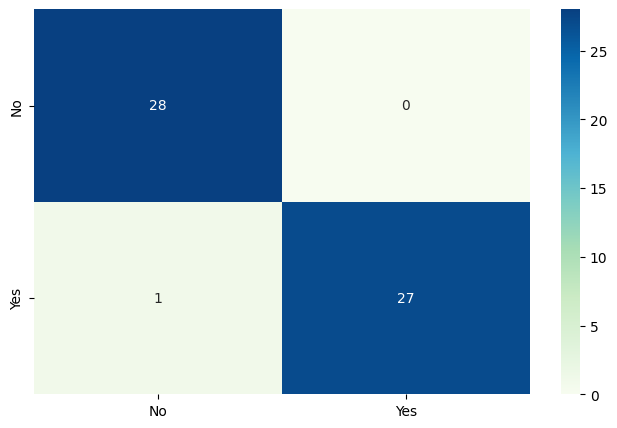

In [65]:
chars = np.unique(y_test)
chars_pred = np.unique(y_pred)

confusion = metrics.confusion_matrix(y_test, y_pred, labels=chars)
confusion_df = pd.DataFrame(confusion, index=chars, columns=chars_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_df, annot=True, fmt='g', cmap=plt.cm.GnBu)
plt.show()

**In this part, because our values are non-numerical, we do this and then draw scatter.**

In [66]:
from sklearn.preprocessing import LabelEncoder

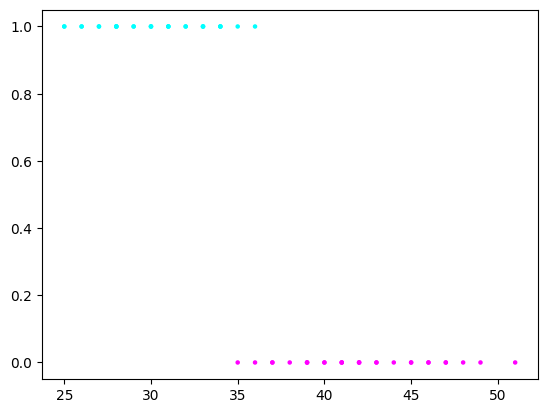

In [67]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)
plt.scatter(x[:, 0], x[:, 1], c=y_encoder, s=5, cmap=plt.cm.cool)
plt.show()

**After scatter, as described in the explanation of this algorithm, we come and move one dimension higher:**
<p>2D ---> 3D</p>

In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [69]:
z = (x[:, 0] * x[:, 1]).reshape(-1, 1)
xn = np.hstack([x, z])

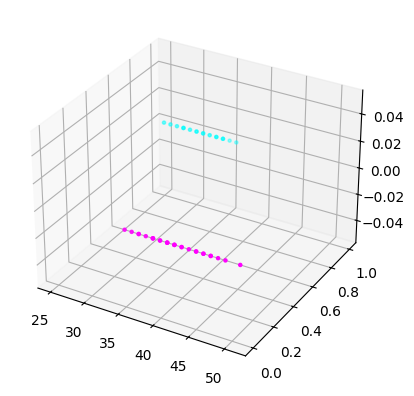

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn[:, 0], xn[:, 1], c=y_encoder, s=5, cmap=plt.cm.cool)
plt.show()

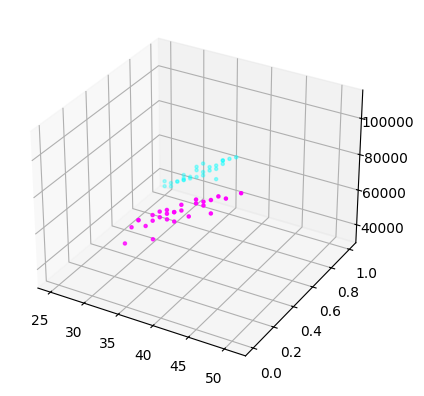

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xn[:, 0], xn[:, 1], xn[:, 2], c=y_encoder, s=5, cmap=plt.cm.cool)
plt.show()